In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
## Read in the test and the train packages. 

train = pd.read_csv('clean_train.csv') 
test = pd.read_csv('clean_test.csv') 



,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,textID,text,selected_text,sentiment,jaccard_score,clean_text,number_characters,number_clean_characters,word_tokens,word_token_count,clean_word_tokens,clean_word_tokens_count
6,6,6,6,6e0c6d75b1,fun,fun,positive,1.000000,fun,3,3,['fun'],1,['fun'],1
7,7,7,7,6e0c6d75b1,fun,fun,positive,1.000000,fun,3,3,['fun'],1,['fun'],1
8,8,8,8,6e0c6d75b1,fun,fun,positive,1.000000,fun,3,3,['fun'],1,['fun'],1
9,9,9,9,6e0c6d75b1,fun,fun,positive,1.000000,fun,3,3,['fun'],1,['fun'],1
10,10,10,10,6e0c6d75b1,fun,fun,positive,1.000000,fun,3,3,['fun'],1,['fun'],1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274855,274855,274855,274855,768e382964,simple greetings from unexpected people can ac...,simple greetings from unexpected people can ac...,positive,0.176471,simple greetings unexpected people actually li...,70,56,"['simple', 'greetings', 'from', 'unexpected', ...",10,"['simple', 'greetings', 'unexpected', 'people'...",7
274858,274858,274858,274858,ea8072c6a6,really wish,really wish,positive,0.833333,really wish,11,11,"['really', 'wish']",2,"['really', 'wish']",2
274868,274868,274868,274868,8f14bb2715,I feel good ab,I feel good ab,positive,0.555556,feel good ab,14,12,"['I', 'feel', 'good', 'ab']",4,"['feel', 'good', 'ab']",3
274871,274871,274871,274871,f67aae2310,Yay good for both of you.,Yay good for both of you.,positive,0.388889,yay good,25,8,"['Yay', 'good', 'for', 'both', 'of', 'you.']",6,"['yay', 'good']",2


In [22]:
def GroupBySentiment(data): 

    ## We want to split the data by sentiment.

    text_sentiment_count = data.groupby(['sentiment'], as_index = False).text.count()

    positive_text = data[data.sentiment == 'positive']
    negative_text = data[data.sentiment == 'negative']
    neutral_text = data[data.sentiment == 'neutral']
    return text_sentiment_count, positive_text, negative_text, neutral_text


## Split data by sentiment
train_text_sentiment_count, train_positive_text, train_negative_text, train_neutral_text = GroupBySentiment(train)

test_text_sentiment_count, test_positive_text, test_negative_text, test_neutral_text = GroupBySentiment(test)

In [23]:
def PlotSentimentCount(data, axis, title): 

    ## Tweet Counts by Sentiment

    import seaborn as sns 
    import matplotlib.pyplot as plt 
    sns.set()

    sns.barplot(x = 'sentiment', y = 'text', data = data, ax = ax[axis]) 
    ax[axis].set_xlabel('Sentiment') 
    ax[axis].set_ylabel('Text Count') 
    ax[axis].set_title(title)

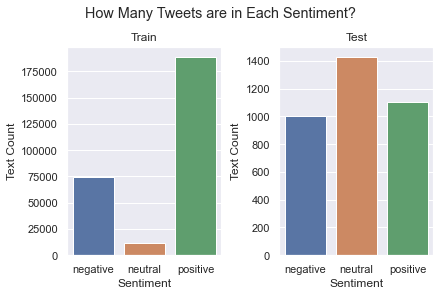

In [24]:
## Tweet Counts By Sentiment
fig, ax = plt.subplots(1, 2, constrained_layout = True )
fig.suptitle('How Many Tweets are in Each Sentiment?') 
PlotSentimentCount(train_text_sentiment_count, 0, 'Train')
PlotSentimentCount(test_text_sentiment_count, 1, 'Test') 

In [19]:
print(train_text_sentiment_count)

  sentiment    text
0  negative   74675
1   neutral   11309
2  positive  188890


In [6]:
## Most Common Words in Selected Text 
import numpy as np
import collections

def Words(data): 

    ## Word Counts 

    words = data.clean_text.apply(lambda x: str(x).split())
    words = collections.Counter([item for sublist in words for item in sublist]) 
    words = pd.DataFrame(words, index = [0]).T 
    words.columns = ['Count'] 
    words = words.sort_values(by = 'Count', ascending = False) 
    words = words[(words.index != '*')]
    words = words[(words.index != "`")]
    return words.head(20)

train_neutral_words = Words(train_neutral_text)
train_positive_words = Words(train_positive_text) 
train_negative_words = Words(train_negative_text) 
train_words = Words(train)



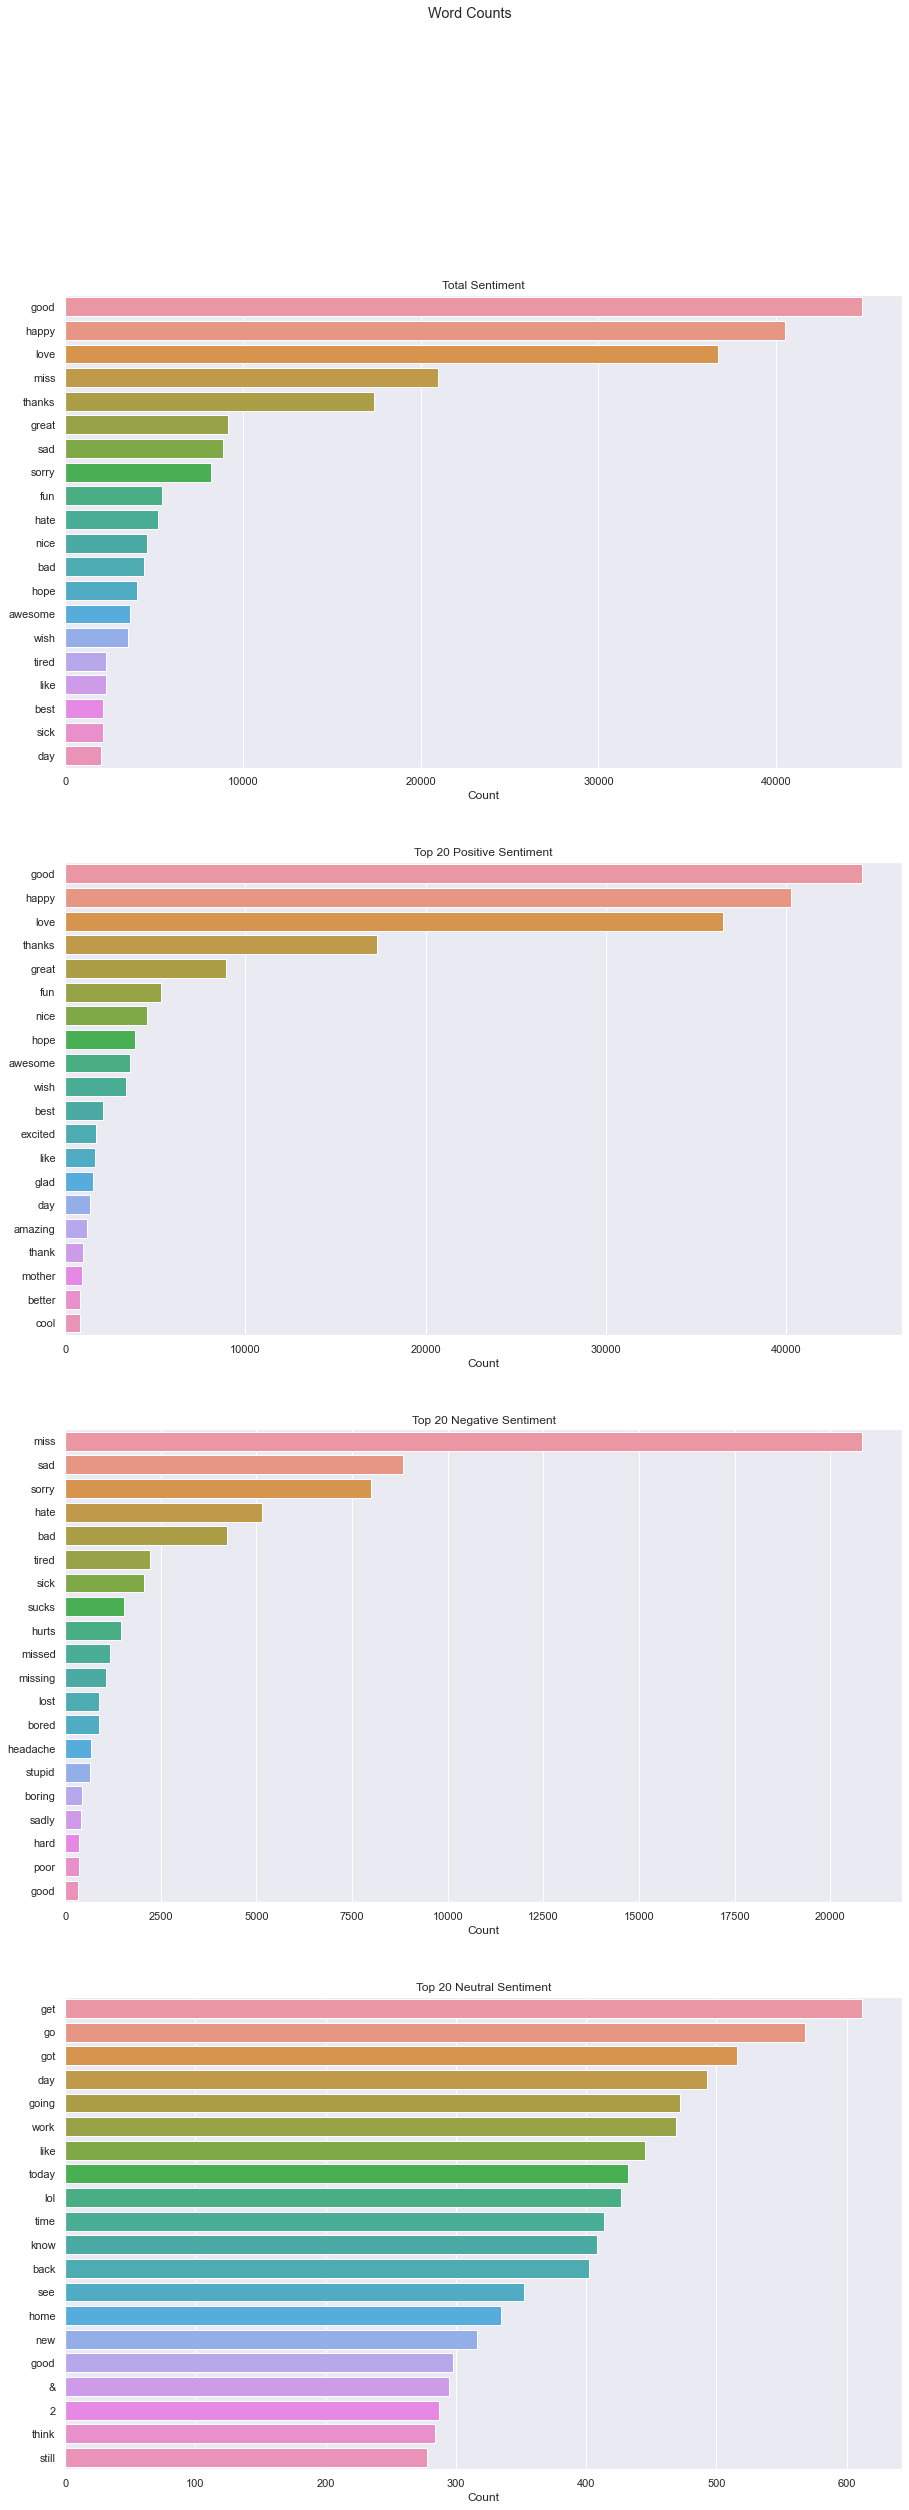

In [7]:
fig, ax = plt.subplots(4,1, figsize = (15, 40))
fig.suptitle('Word Counts')

def PopularWords(data, axis, title): 

    ## Plot the Word Counts

    sns.barplot(x = data.Count, y = data.index, ax = ax[axis])
    ax[axis].set_title('{} Sentiment'.format(title))

PopularWords(train_words, 0, 'Total')
PopularWords(train_positive_words, 1, 'Top 20 Positive') 
PopularWords(train_negative_words, 2, 'Top 20 Negative') 
PopularWords(train_neutral_words, 3, 'Top 20 Neutral') 

fig.savefig('WordCounts.jpg')



In [8]:
## Word Distribution Descriptive Stats

words_distribution_description = train_positive_words.describe().T

words_distribution_description = words_distribution_description.append(train_negative_words.describe().T) 

words_distribution_description = words_distribution_description.append(train_neutral_words.describe().T) 
words_distribution_description = words_distribution_description.append(train_words.describe().T)

words_distribution_description.index = ['Positive', 'Negative', 'Neutral', 'Train']

words_distribution_description['Sentiment'] = words_distribution_description.index

words_distribution_description

,count,mean,std,min,25%,50%,75%,max,Sentiment
Positive,20.0,9054.80,14055.237033,821.0,1349.25,2729.0,6208.50,44202.0,Positive
Negative,20.0,3079.05,4866.730930,343.0,599.25,1131.5,2731.50,20830.0,Negative
Neutral,20.0,405.15,98.636107,278.0,311.50,411.0,469.75,612.0,Neutral
Train,20.0,11428.30,13622.093885,2033.0,3241.75,4912.0,11211.50,44843.0,Train


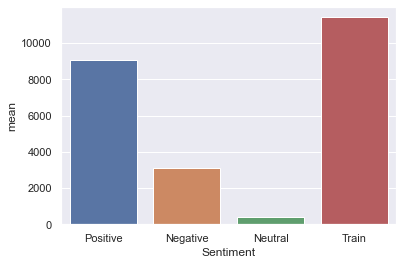

In [9]:
## Bar plot of the mean of the word count by sentiment. 
sns.barplot(x = 'Sentiment', y = 'mean', data = words_distribution_description) 

In [10]:
## Calculate the means of the number of characters of tweets based by sentiment


positive_means = [train_positive_text.number_characters.mean(), train_positive_text.number_clean_characters.mean()] 
negative_means = [train_negative_text.number_characters.mean(), train_negative_text.number_clean_characters.mean()] 
neutral_means = [train_neutral_text.number_characters.mean(), train_neutral_text.number_clean_characters.mean()] 
train_means = [train.number_characters.mean(), train.number_clean_characters.mean()]


means = {'Positive Mean': positive_means, 
            'Negative Mean': negative_means, 
            'Neutral Mean': neutral_means, 
            'Total Mean': train_means}
means = pd.DataFrame(means).transpose()
means.columns = ['NumberCharacters', 'NumberCleanCharacters']
means

,NumberCharacters,NumberCleanCharacters
Positive Mean,5.355614,5.079517
Negative Mean,5.967620,5.397054
Neutral Mean,61.785127,38.066673
Total Mean,7.843528,6.522956


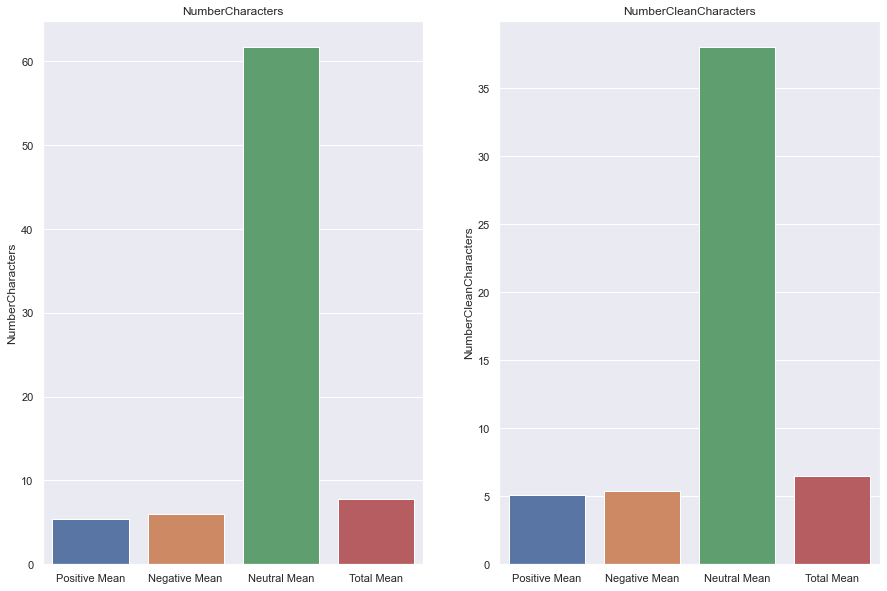

In [11]:
fig, ax = plt.subplots(1,2, figsize = (15, 10) )

def PlotMeans(data, clean_or_dirty, axis): 
    
    ## Means of the character count

    sns.barplot(x = data.index, y = data[clean_or_dirty], ax = ax[axis] ).set_title(clean_or_dirty)

j = 0
for column in means.columns: 
    PlotMeans(means, column, j)
    j+=1




In [12]:
train.number_characters.describe()

count    274874.000000
mean          7.843528
std          14.882068
min           1.000000
25%           4.000000
50%           4.000000
75%           5.000000
max         141.000000
Name: number_characters, dtype: float64

Text(0.5, 1.0, 'Train Uncleaned')

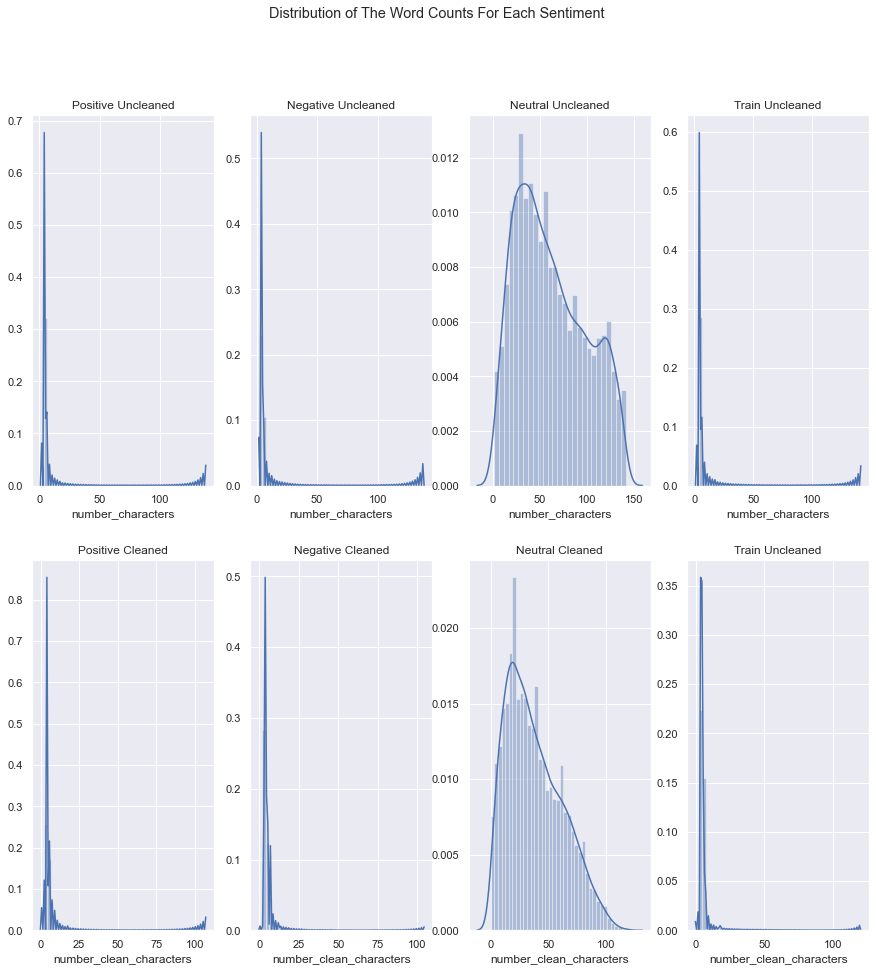

In [13]:
## Distribution of the Word Counts for each sentiment

fig, ax = plt.subplots(2, 4, figsize = (15, 15))
plt.suptitle('Distribution of The Word Counts For Each Sentiment')



sns.distplot(train_positive_text.number_characters, ax = ax[0,0]).set_title('Positive Uncleaned') 
sns.distplot(train_negative_text.number_characters, ax = ax[0,1]).set_title('Negative Uncleaned') 
sns.distplot(train_neutral_text.number_characters, ax = ax[0,2]).set_title('Neutral Uncleaned') 
sns.distplot(train.number_characters, ax = ax[0,3]).set_title('Train Uncleaned') 


sns.distplot(train_positive_text.number_clean_characters, ax = ax[1,0]).set_title('Positive Cleaned') 
sns.distplot(train_negative_text.number_clean_characters, ax = ax[1,1]).set_title('Negative Cleaned') 
sns.distplot(train_neutral_text.number_clean_characters, ax = ax[1,2]).set_title('Neutral Cleaned') 
sns.distplot(train.number_clean_characters, ax = ax[1,3]).set_title('Train Uncleaned') 

In [14]:
train.head()
train.to_csv('clean_train.csv')
test.to_csv('clean_test.csv') 

In [15]:
train.head()

,Unnamed: 0,Unnamed: 0.1,textID,text,selected_text,sentiment,jaccard_score,clean_text,number_characters,number_clean_characters,word_tokens,word_token_count,clean_word_tokens,clean_word_tokens_count
0,0,0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0.346154,` responded going,35,17,"['I`d', 'have', 'responded,', 'if', 'I', 'were...",7,"['`', 'responded', 'going']",3
1,1,1,549e992a42,Sooo SAD,Sooo SAD,negative,0.454545,sooo sad,8,8,"['Sooo', 'SAD']",2,"['sooo', 'sad']",2
2,2,2,088c60f138,bullying me,bullying me,negative,0.833333,bullying,11,8,"['bullying', 'me']",2,['bullying'],1
3,3,3,9642c003ef,leave me alone,leave me alone,negative,0.400000,leave alone,14,11,"['leave', 'me', 'alone']",3,"['leave', 'alone']",2
4,4,4,358bd9e861,"Sons of ****,","Sons of ****,",negative,0.444444,sons * * * *,13,12,"['Sons', 'of', '****,']",3,"['sons', '*', '*', '*', '*']",5


Text(0.5, 1.0, 'Jaccard Score Between Tweet and Phrase, By WordCount')

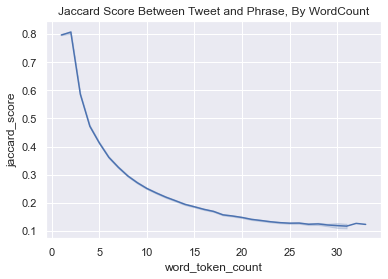

In [16]:
sns.lineplot(data = train, x = 'word_token_count', y = 'jaccard_score').set_title('Jaccard Score Between Tweet and Phrase, By WordCount')

array(['fun', 'like', 'DANGERously', ..., 'haox.', 't bored', 'd lost'],
      dtype=object)

In [17]:
train.count() 

Unnamed: 0                 274874
Unnamed: 0.1               274874
textID                     274874
text                       274874
selected_text              274874
sentiment                  274874
jaccard_score              274874
clean_text                 274611
number_characters          274874
number_clean_characters    274874
word_tokens                274874
word_token_count           274874
clean_word_tokens          274874
clean_word_tokens_count    274874
dtype: int64

In [28]:
train

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,textID,text,selected_text,sentiment,jaccard_score,clean_text,number_characters,number_clean_characters,word_tokens,word_token_count,clean_word_tokens,clean_word_tokens_count
0,0,0,0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,0.346154,` responded going,35,17,"['I`d', 'have', 'responded,', 'if', 'I', 'were...",7,"['`', 'responded', 'going']",3
1,1,1,1,549e992a42,Sooo SAD,Sooo SAD,negative,0.454545,sooo sad,8,8,"['Sooo', 'SAD']",2,"['sooo', 'sad']",2
2,2,2,2,088c60f138,bullying me,bullying me,negative,0.833333,bullying,11,8,"['bullying', 'me']",2,['bullying'],1
3,3,3,3,9642c003ef,leave me alone,leave me alone,negative,0.400000,leave alone,14,11,"['leave', 'me', 'alone']",3,"['leave', 'alone']",2
4,4,4,4,358bd9e861,"Sons of ****,","Sons of ****,",negative,0.444444,sons * * * *,13,12,"['Sons', 'of', '****,']",3,"['sons', '*', '*', '*', '*']",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274869,274869,274869,274869,4eac33d1c0,d lost,d lost,negative,1.000000,lost,6,4,"['d', 'lost']",2,['lost'],1
274870,274870,274870,274870,4f4c4fc327,", don`t force",", don`t force",negative,0.733333,` force,13,7,"[',', 'don`t', 'force']",3,"['`', 'force']",2
274871,274871,274871,274871,f67aae2310,Yay good for both of you.,Yay good for both of you.,positive,0.388889,yay good,25,8,"['Yay', 'good', 'for', 'both', 'of', 'you.']",6,"['yay', 'good']",2
274872,274872,274872,274872,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,0.333333,worth * * * *,26,13,"['But', 'it', 'was', 'worth', 'it', '****.']",6,"['worth', '*', '*', '*', '*']",5
